# Publication Visuals

This notebook produces draft and final visuals for use in the technical note.

#### Color Palette
```
#409acb // background 0
#fe8266 // monoculture 1
#8edc86 // agroforestry 2
#1c5718  // natural 3
```

### S2 histograms for Pub
Goal is to illustrate the spectral signature of the different land use classes, with two types of agroforestry that show radically different signatures.

Potential tiles:
-  (1670, 1075), (1659, 1070), 'Agroforestry x Agroforestry' - illustrate two AF plots with quite different signatures, find out what type of agroforestry

Monoculture: (1658, 1063), (1658, 1064)  
Natural: (1654, 1065), (1653, 1065), (1658,1072), (1677, 1098)- sparse wetland area in northern pd_east, (1649, 1130)- northern parkland  
Cocoa agroforestry: (1646, 1082), (1648, 1083)
Shea tree: (1660, 1128), (1661, 1128),

In [4]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import sys
import numpy as np
import pandas as pd
from osgeo import gdal
sys.path.append('../../src/')
# import utils.quick_viz as make
# import utils.spectral_sig as s
%load_ext autoreload
%autoreload 2

old_color_dict = {
    'monoculture': '#fe6742',
    'agroforestry': '#72dc68',
    'natural': '#174814',
}
new_color_dict = {
    'Monoculture': '#fe8266',
    'Agroforestry': '#8edc86',
    'Natural': '#1c5718',
    'Background':'#409acb',
}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
print(gdal.__version__)

3.5.0


In [7]:
## Transform to COG
in_tif  = "../../tmp/ghana/preds/mosaic/twifo_pubfig.tif"
out_tif = "../../tmp/ghana/preds/mosaic/twifo_pubfig_COG.tif"


src_ds = gdal.Open(in_tif, gdal.GA_ReadOnly)

# set up translate options: use COG driver, and creation options
translate_options = gdal.TranslateOptions(
    format = "COG",               # Use the COG driver (requires GDAL ≥ 3.1) :contentReference[oaicite:1]{index=1}
    creationOptions = [
        "COMPRESS=LZW",           # lossless compression (could also use DEFLATE, etc) :contentReference[oaicite:2]{index=2}
        "BLOCKSIZE=512",          # good tile size for cloud optimization :contentReference[oaicite:3]{index=3}
    ]
)

# perform the translation
dst_ds = gdal.Translate(out_tif, src_ds, options=translate_options)
dst_ds = None
src_ds = None


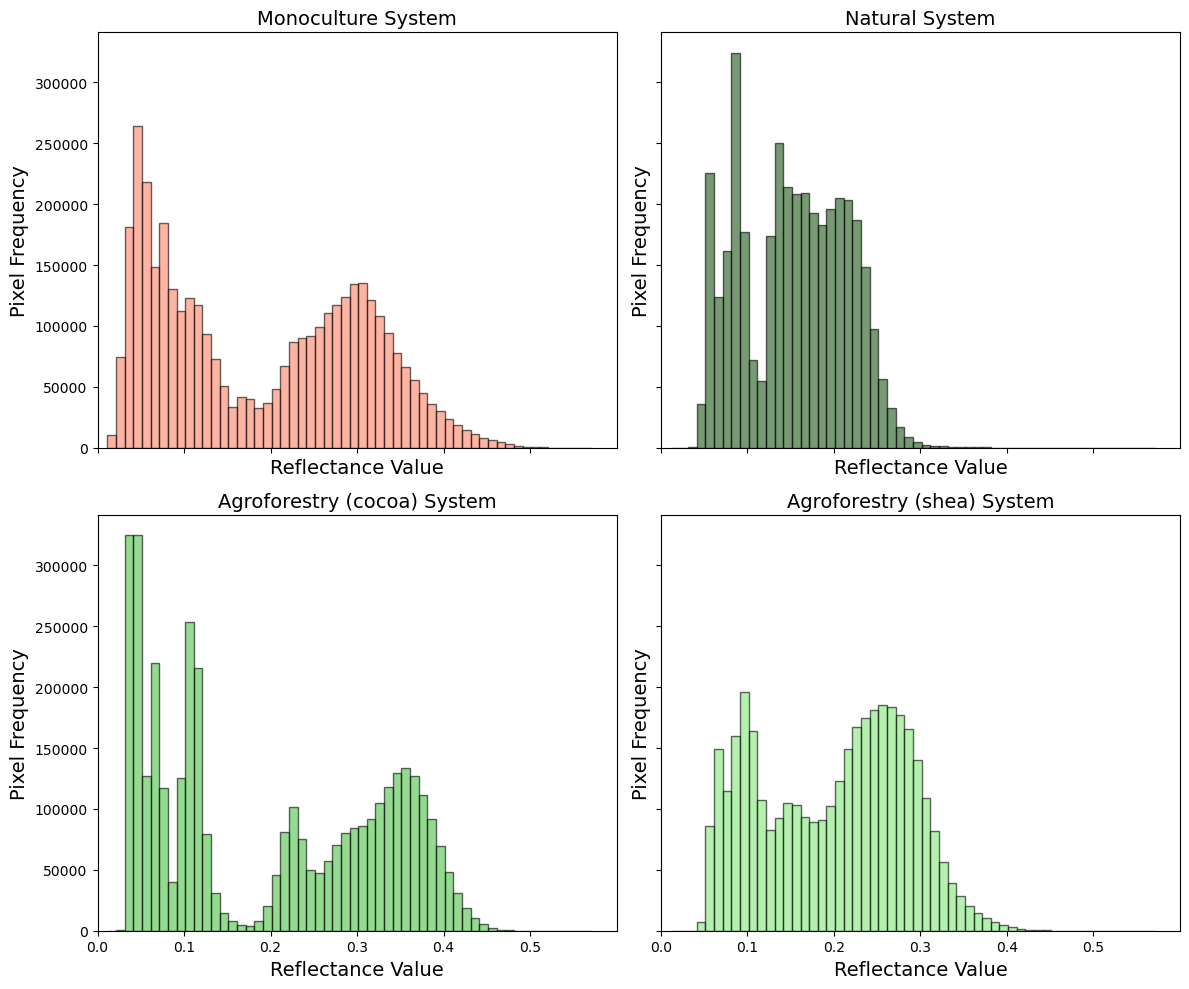

In [7]:
make.hist_individual_tile('ghana', 
                     (1658, 1064),
                     (1648, 1083), #cocoa
                     (1660, 1128), #shea
                     #(1654, 1065), 
                     (1649, 1130), # parkland
                     'Average Spectral Signatures of Sentinel-2 Analysis Ready Data',
                     output_file='../../data/figures/s2_hist.png'
                         )

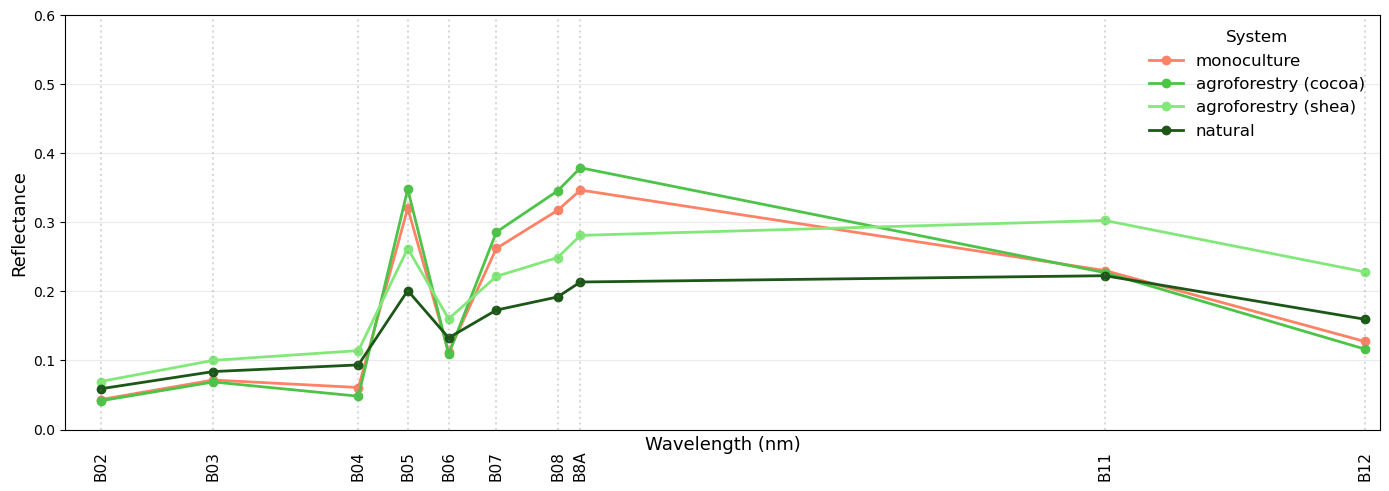

In [7]:
s.spectral_signature('ghana', 
                     (1658, 1064), #monoculture
                     (1648, 1083), #cocoa
                     (1660, 1128), #shea
                     (1649, 1130), # parkland / natural
                     output_file='../../data/figures/Figure_9_spectralsig')

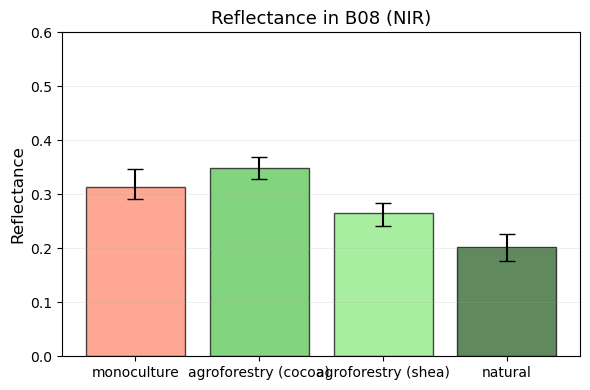

In [5]:
make.plot_single_band_reflectance('ghana', 
                             tile_indices=[(1658, 1064),   # monoculture
                                          (1648, 1083),   # agroforestry (cocoa)
                                          (1660, 1128),   # agroforestry (shea)
                                          (1649, 1130)],  # natural (parkland)
                            systems=['monoculture',
                                     'agroforestry (cocoa)',
                                     'agroforestry (shea)',
                                     'natural'],
                            band_index= 3,   # e.g. 0=B2, 1=B3, 2=B4, 3=B8, etc.
                            band_name = "B08 (NIR)")

In [54]:
# make.hist_compare_s2_byband('ghana', 
#                              (1658, 1064),
#                              (1648, 1083), #cocoa
#                              (1660, 1128), #shea
#                             "Band sig",
#                                color_dict= {'monoculture': '#fe8266',
#                   "agroforestry (cocoa)" : '#4dc348',
#                   'agroforestry (shea)' : "#83e87a",
#                   'natural': '#1c5718'})

In [55]:
# this one uses shea
# make.hist_individual_tile('ghana', 
#                      (1658, 1064),
#                      (1660, 1128), 
#                      (1654, 1065), 
#                      'Spectral Signatures of Sentinel-2 Analysis Ready Data',
#                       new_color_dict)

In [10]:
# # this one looks at natural parkland system -- much more similar to shea
# make.hist_individual_tile('ghana', 
#                      (1658, 1064),
#                      (1660, 1128), 
#                      (1649, 1130), 
#                      'Spectral Signatures of Sentinel-2 Analysis Ready Data',
#                       color_dict)


## Other experiments

In [8]:
# make.hist_individual_tile('ghana', 
#                      (1658, 1063),
#                      (1646, 1082), 
#                      (1654, 1065), 
#                      'Monoculture x AF x Natural')

In [9]:
# #This monoculture is better, but natural is worse (includes more AF system)
# make.hist_individual_tile('ghana', 
#                      (1658, 1064),
#                      (1646, 1082), 
#                      (1653, 1065), 
#                      'Monoculture x AF x Natural')

## Vertical Stacked Barchart

/var/folders/1v/8qs7l7157sddx1_9z9wqldrc0000gp/T/ipykernel_94034/3802395651.py:86: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.district, rotation=55, ha="right")


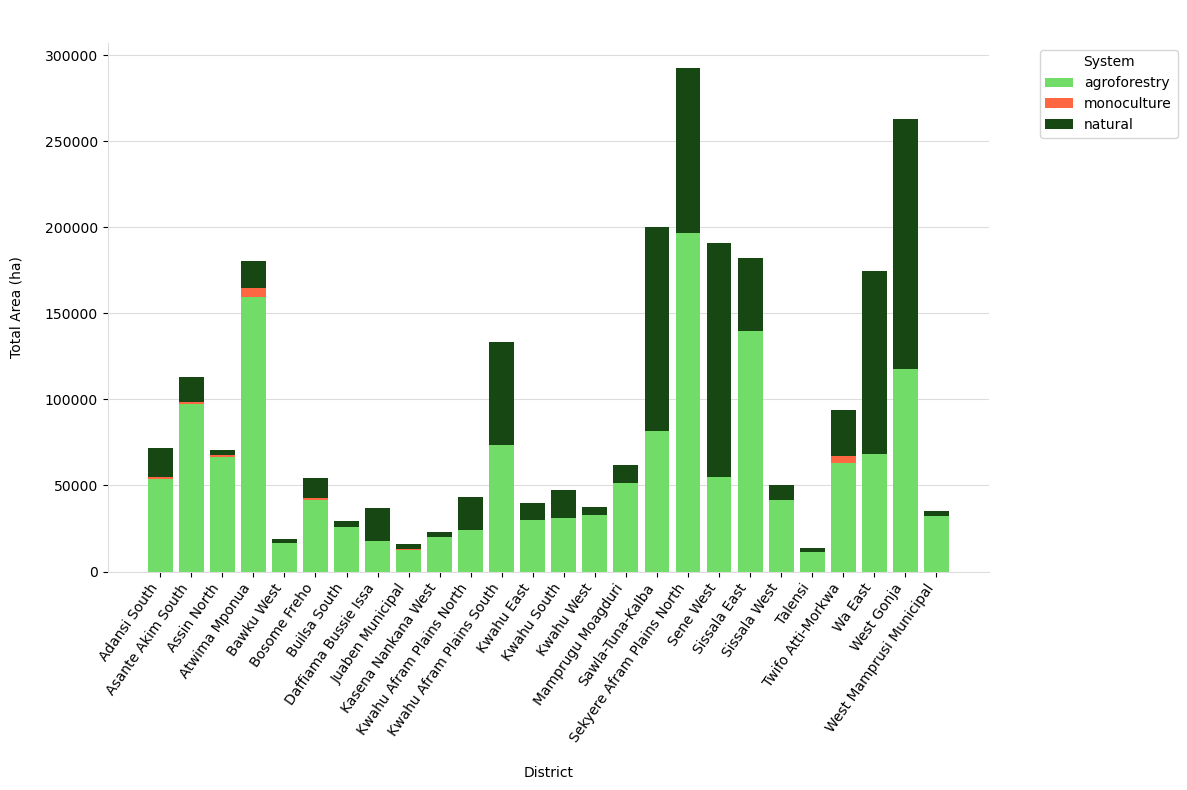

In [29]:
df = pd.read_csv('../../data/area_assessment.csv')

categories = ['agroforestry', 'monoculture', 'natural']

# Generate the plot
make.vertical_stacked_bar(
    df=df.drop(columns=['no_data']),  # Exclude no_data column
    title=" ",
    color_dict=color_dict,
    categories=categories,
    output_file='../../data/figures/stacked_bar.png'
)

## Horizontal 100% Stacked Barchart

### Northern Districts

/Users/jessica.ertel/github/plantation_classifier/notebooks/analyses/../../src/utils/quick_viz.py:55: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.yaxis.grid(ygrid, color=grid_color)


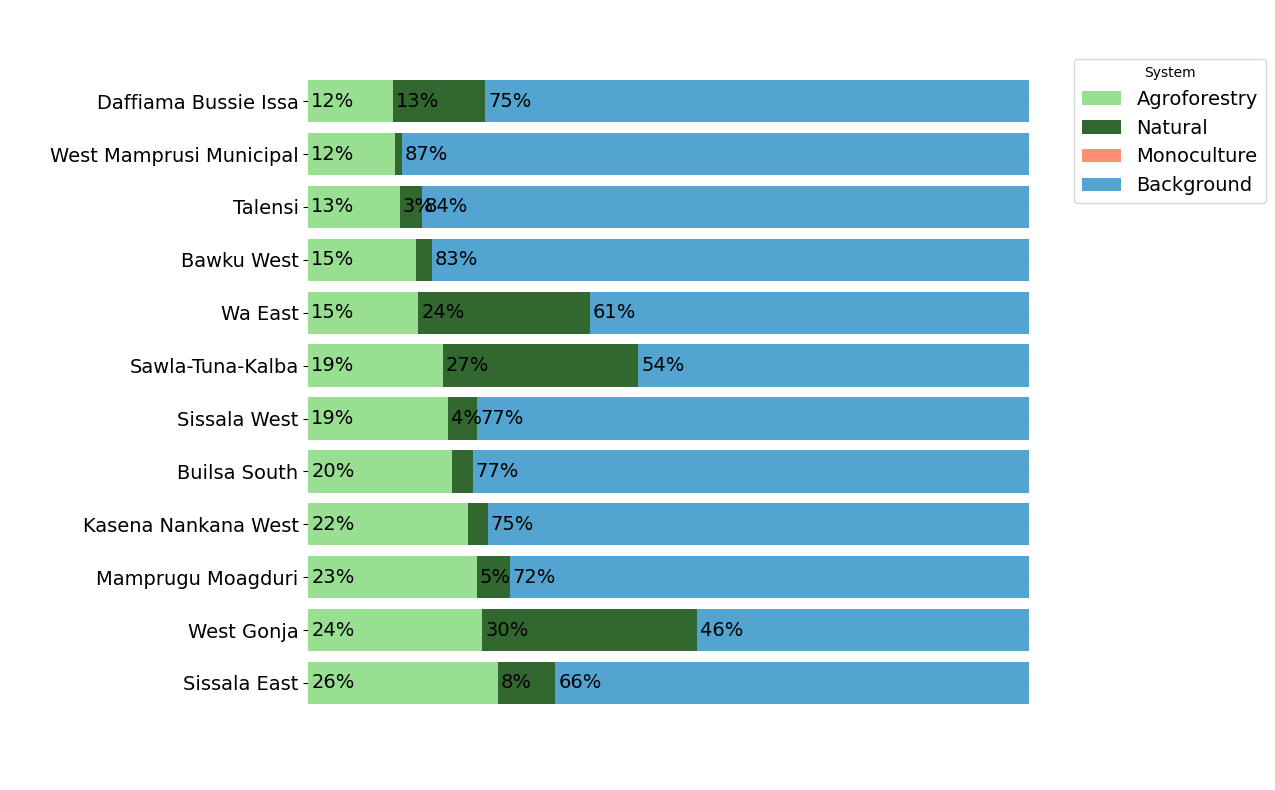

In [68]:
make.horizontal_stacked_bar('../../data/area_assessments/adj_area_assessment_081825.csv',
    region='north',
    color_dict=new_color_dict,
    sort_by='Agroforestry (ha)',
    alpha=.9,
)

### Southern Districts

/Users/jessica.ertel/github/plantation_classifier/notebooks/analyses/../../src/utils/quick_viz.py:55: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.yaxis.grid(ygrid, color=grid_color)


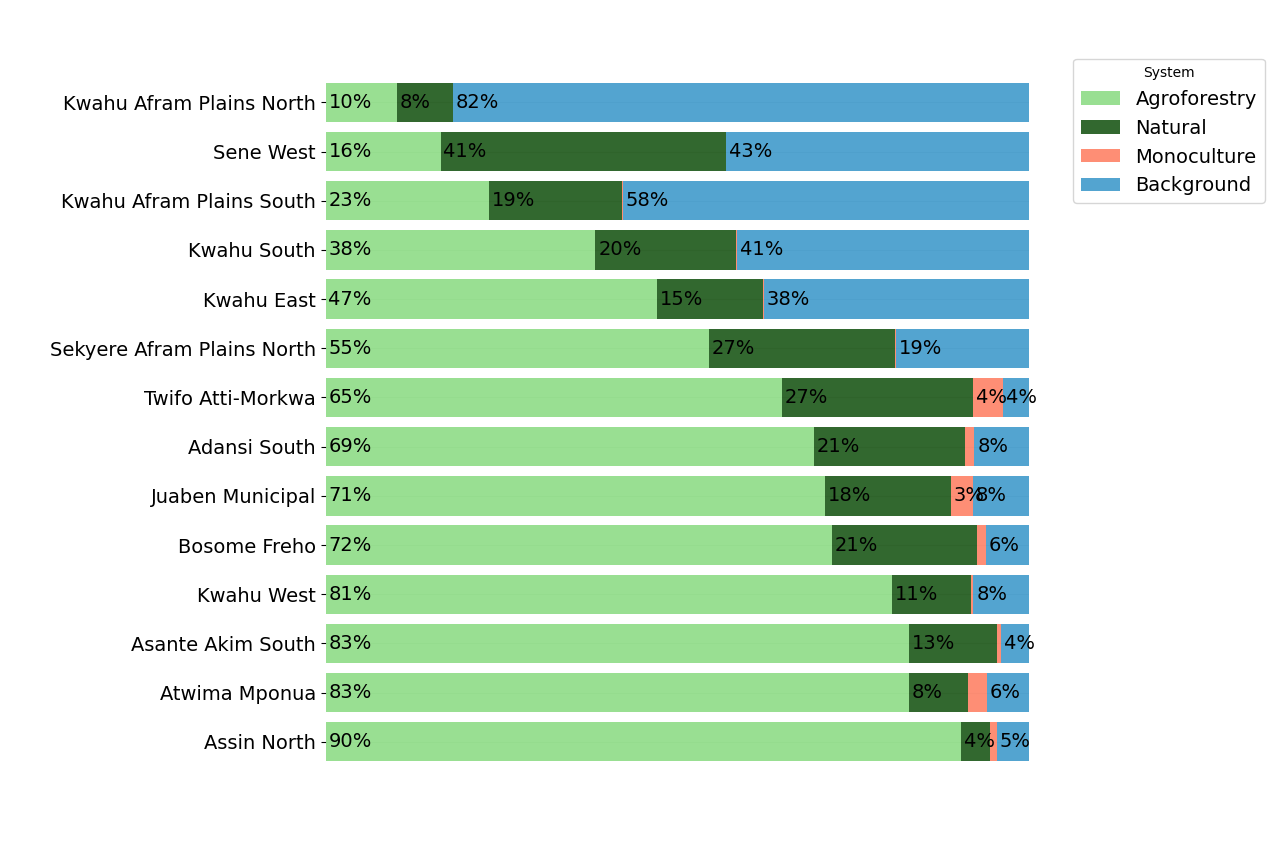

In [69]:
make.horizontal_stacked_bar('../../data/area_assessments/adj_area_assessment_081825.csv',
    region='south',
    color_dict=new_color_dict,
    sort_by='Agroforestry (ha)',
    alpha=.9,
    figsize=(13,8.6)
)

In [7]:
# calculate totals for results section
adj = pd.read_csv('../../data/adj_area_assessment_042125.csv')
adj.sum()

No vegetation                                            3544545.0
Monoculture                                                42773.0
Agroforestry                                             1183273.0
Natural                                                   711900.0
No data                                                 4646938.74
district         Adansi SouthAsante Akim SouthAssin NorthAtwima...
dtype: object

## Learning Curve Comparison

In [3]:
## need to figure out how to create inputs in order to run this
# import create_xy from src/features 
# includes texture 78: is texture
df = pd.read_csv('../../data/cleanlab/cleanlab_demo3.csv')

X_train_full = df.iloc[:179728, 0:78]
X_train_drop_ttc = df.iloc[:179728, 0:13]
y_train = df.iloc[:179728, -1:]
X_train_full.shape, X_train_drop_ttc.shape, y_train.shape

((179728, 78), (179728, 13), (179728, 1))

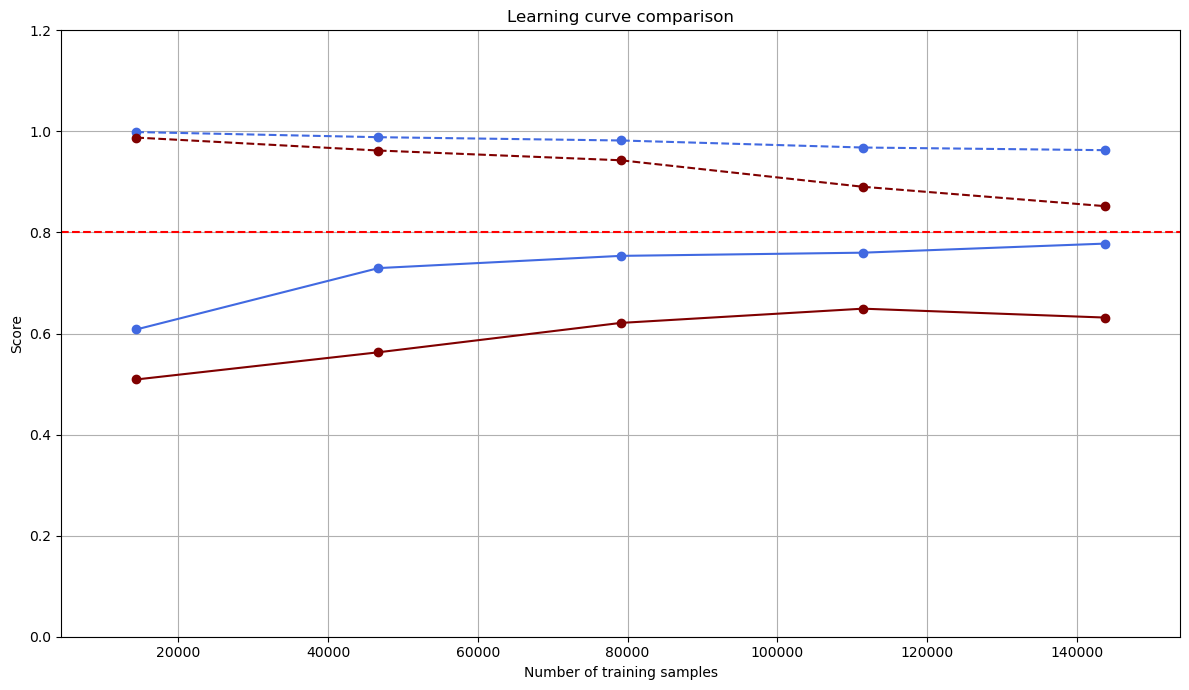

In [5]:
make.learning_curve_catboost(X_train_full,
                            X_train_drop_ttc,
                            y_train,
                            output_file='../../data/figures/learning_curve')

## Hist of Multiple Tiles
Overlay 2 or more sentinel tiles comprised of a majority land use.

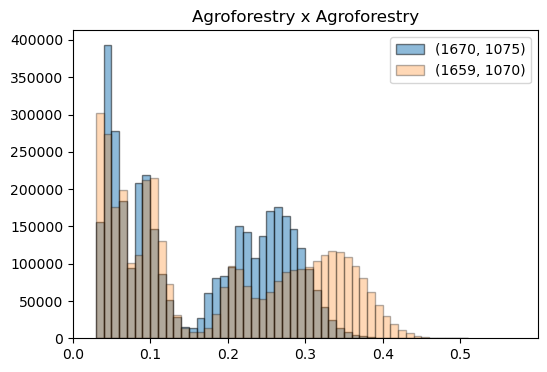

In [14]:
make.hist_compare_s2('ghana', (1670, 1075), (1659, 1070), 'Agroforestry x Agroforestry');

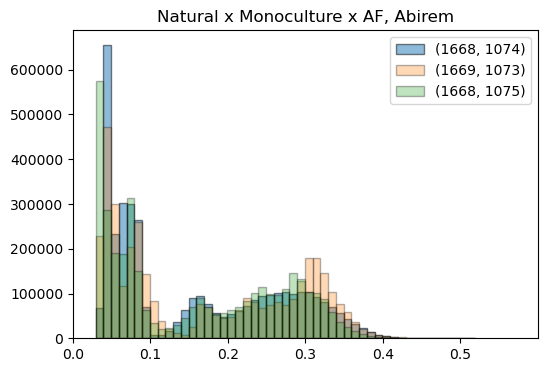

In [3]:
make.hist_compare_s2('ghana', (1668, 1074), (1669, 1073), 'Natural x Monoculture x AF, Abirem', (1668, 1075));

In [45]:
# the tile for abirem is agroforestry w some smallholder oil palm
# the tile for pd_southeast is a natural forest misclassified as agroforestry
#make.hist_compare_s2('ghana', (1668, 1075), (1661, 1074), 'Agroforestry x Predicted Agroforestry');

In [42]:
#make.hist_compare_s2_byband('ghana', (1668, 1074), (1669, 1073), 'Natural x Monoculture x AF, Abirem', (1668, 1075));

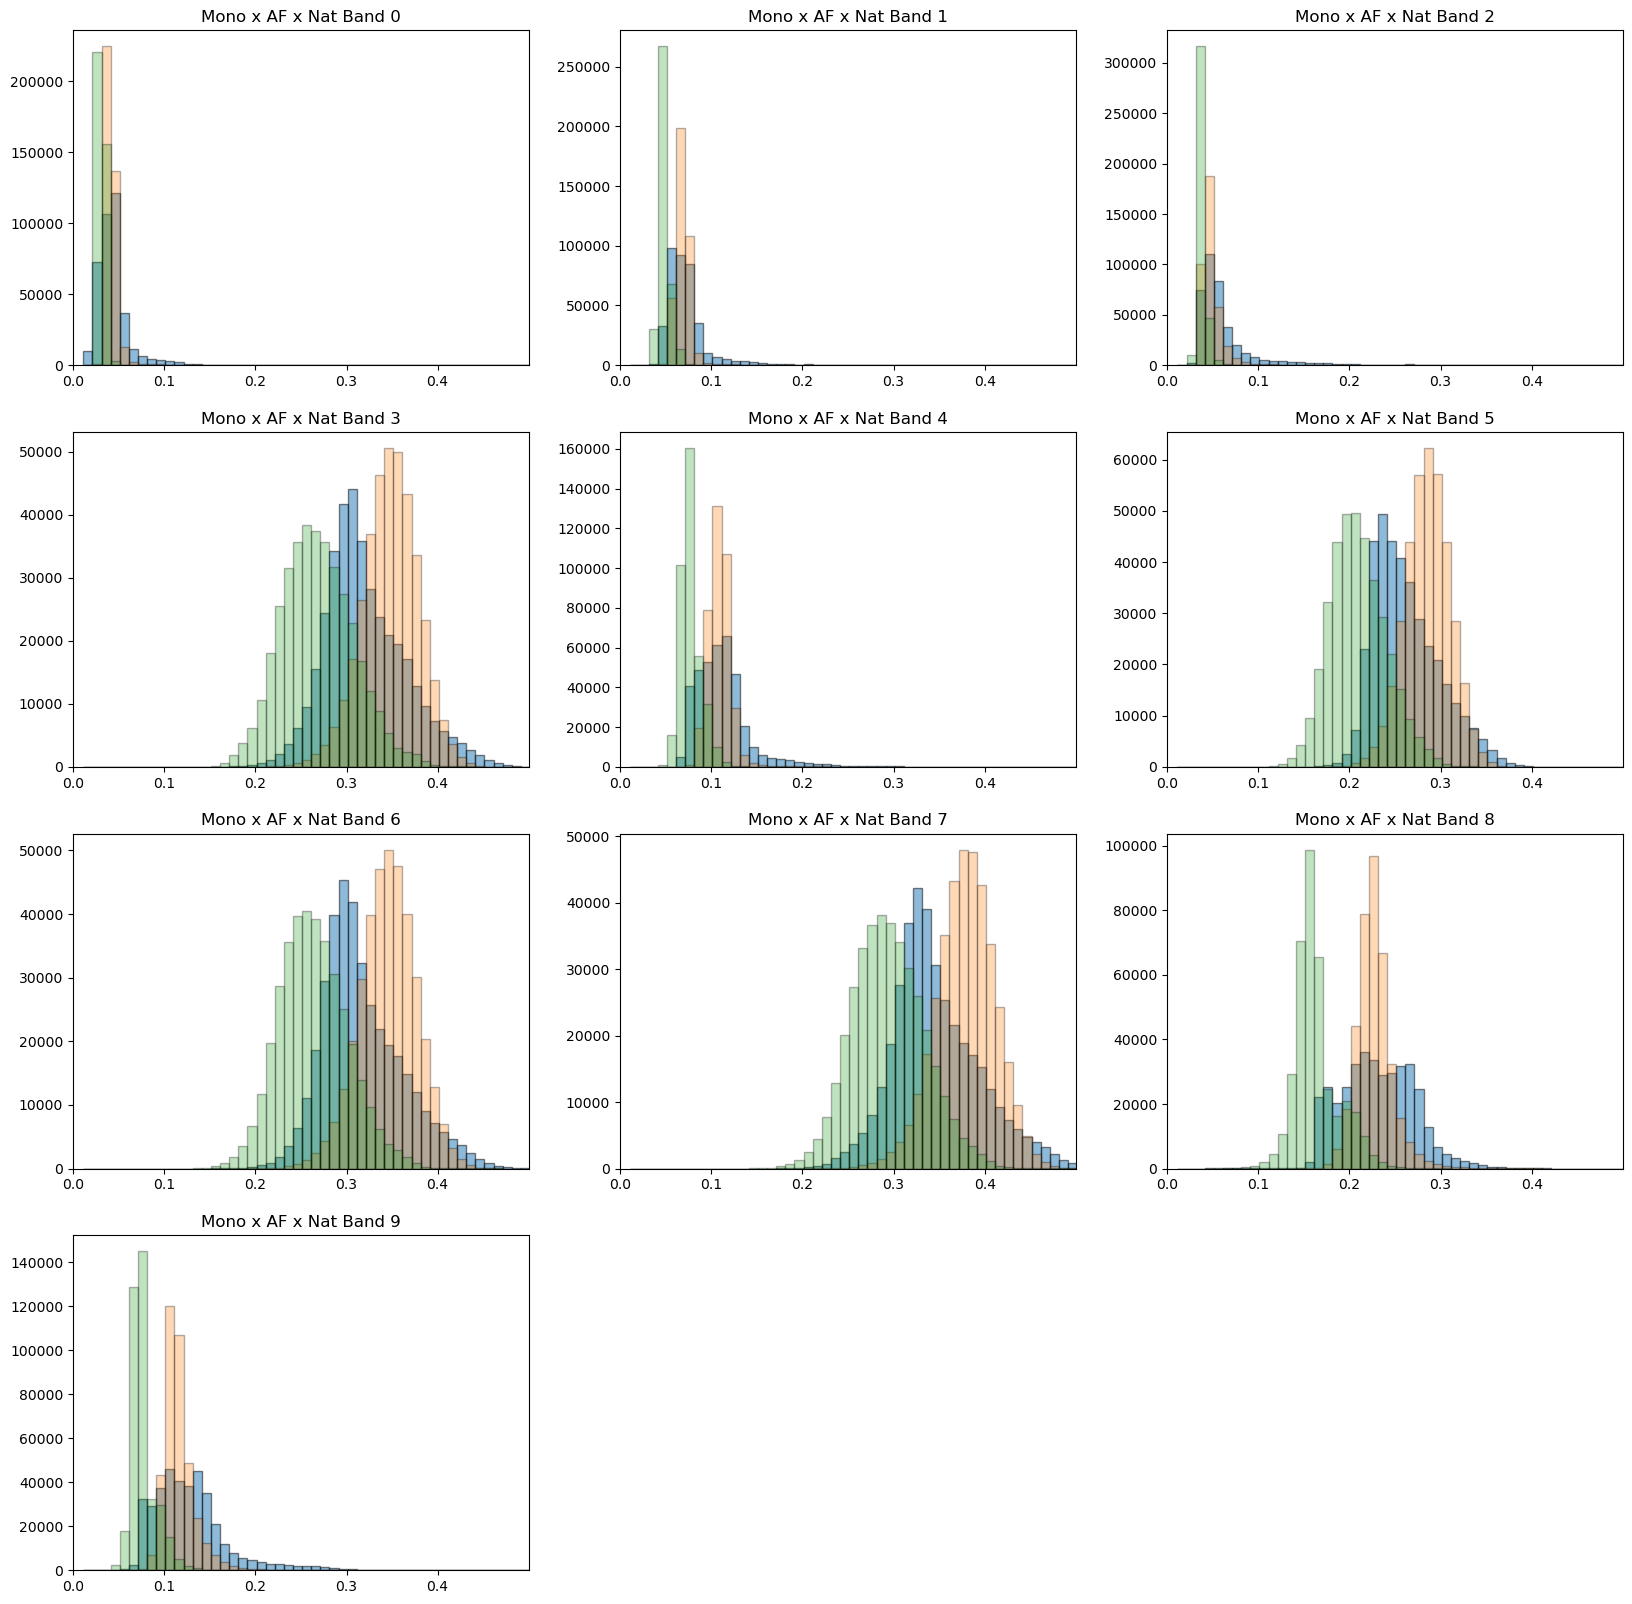

In [5]:
# (1658, 1064),
# (1648, 1083), 
# (1654, 1065)

make.hist_compare_s2_byband('ghana', (1658, 1064), (1648, 1083), 'Mono x AF x Nat', (1654, 1065));   

## Feature Importance

/Users/jessica.ertel/github/plantation_classifier/notebooks/analyses/../../src/utils/quick_viz.py:697: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.xaxis.grid(xgrid,color=grid_color)


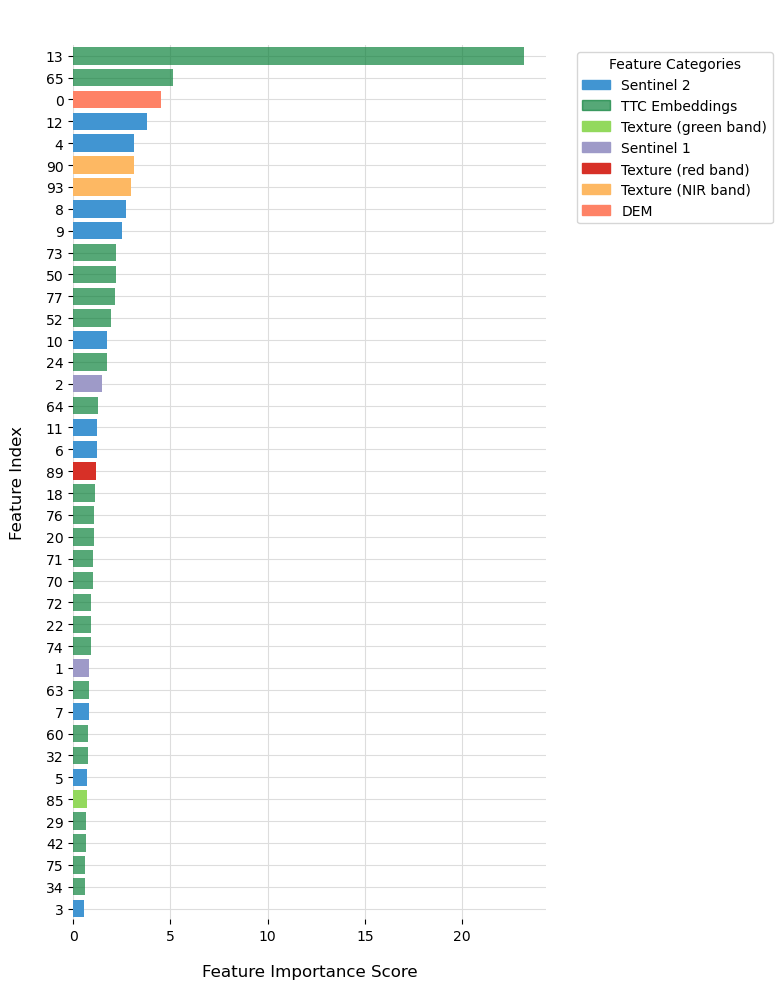

In [2]:
impt_df = pd.read_csv("../../data/figures/feat_selection_data.csv")
make.plot_feature_importance(impt_df, output_file="../../data/figures/figure_8_featimp.png")